In [ ]:
#!pip install numpy==1.15.4
#!pip install deepdish
#!pip install tensorflow==1.15

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import deepdish as dd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [46]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ISIS_dataset')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#!pip install numpy==1.15.4

  Using cached https://files.pythonhosted.org/packages/ff/7f/9d804d2348471c67a7d8b5f84f9bc59fd1cefa148986f2b74552f8573555/numpy-1.15.4-cp36-cp36m-manylinux1_x86_64.whl
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.15.4 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: astropy 4.1 has requirement numpy>=1.16, but you'll have numpy 1.15.4 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.4
    Uninstalling nump

In [47]:
data = dd.io.load('ISIC_dataset.h5')
data_df = pd.DataFrame(data)

In [48]:
X_raw = data_df.image
Y = data_df.cell_type_idx

In [49]:
X = np.array(list(X_raw)).reshape((len(X_raw),75,100,3))
X.shape

(10015, 75, 100, 3)

In [50]:
y_hot = np.array(pd.get_dummies(Y))

In [51]:
y_hot.shape

(10015, 7)

In [52]:

def incrementado_datos(imagenes_lista):
  images = imagenes_lista
  seq = iaa.Sequential([
      iaa.Fliplr(0.5), # horizontal flips
      iaa.Crop(percent=(0, 0.1)), # random crops
      # Small gaussian blur with random sigma between 0 and 0.5.
      # But we only blur about 50% of all images.
      iaa.Sometimes(
          0.5,
          iaa.GaussianBlur(sigma=(0, 0.5))
      ),
      # Strengthen or weaken the contrast in each image.
      iaa.LinearContrast((0.75, 1.5)),
      # Add gaussian noise.
      # For 50% of all images, we sample the noise once per pixel.
      # For the other 50% of all images, we sample the noise per pixel AND
      # channel. This can change the color (not only brightness) of the
      # pixels.
      iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
      # Make some images brighter and some darker.
      # In 20% of all cases, we sample the multiplier once per channel,
      # which can end up changing the color of the images.
      iaa.Multiply((0.8, 1.2), per_channel=0.2),
      # Apply affine transformations to each image.
      # Scale/zoom them, translate/move them, rotate them and shear them.
      iaa.Affine(
          #scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
          translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
          rotate=(-180, 180),
          shear=(-8, 8)
      )
  ], random_order=True) # apply augmenters in random order

  return seq(images=images)

In [ ]:
"""print(Prueba_x.shape)
lista_img = []
for i in range(len(Prueba_x)):
  images = np.array([ Prueba_x[i] for _ in range(5)],dtype=np.uint8)
  nuevos_datos = incrementado_datos(images)
  lista_img.append(nuevos_datos)"""

In [ ]:
#new_images = np.array(lista_img).reshape(-1,75,100,3)

In [ ]:
#new_images.shape

(25, 75, 100, 3)

In [ ]:
for i in range(len(new_images)):
  if i%5 == 0:
    plt.imshow(new_images[i])
    plt.show()

In [23]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
folder="/content/prueba"

In [24]:
image= load_images_from_folder(folder)

In [ ]:
k = 1
for i in image:
  plt.imshow(i)
  print("Num:",k,i.shape, i.max(),i.min())
  k+=1
  plt.show()

In [ ]:
import cv2

Original Dimensions :  (75, 100, 3)
Resized Dimensions :  (227, 227, 3)


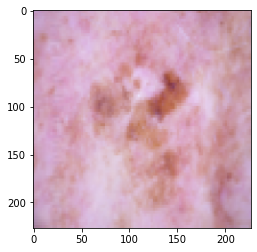

In [ ]:
img = X_raw[0]
 
print('Original Dimensions : ',img.shape)
width =227
height = 227
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',resized.shape)
plt.imshow(resized)

In [ ]:
for i in range(len(X_raw)):
  img = X_raw[i]
  width = 227
  height = 227
  dim = (width, height)
  img_resized = cv2.resize(img, dim , interpolation = cv2.INTER_AREA)
  X_raw[i] = img_resized
print(X_raw.shape)
print(X_raw[0].shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(10015,)
(227, 227, 3)


In [ ]:
#x_train2 = []
#for img in X_1:
 #   if len(img.shape) == 3:
  #      x_train2.append((cv2.resize(img,(227,227))))

#X_1 = np.array(x_train2).reshape(len(x_train2),227,227,3) #Segun lo que lei esto transforma en un 4d de 1d es decir: de (n,) a (n,227,227,3)
#El codigo de arriba, se aplica en caso de que no funcione, por lo visto si alguna imagen no tiene la dimesion correcta no se puede aplicar lo anterior.

In [ ]:
#Este codigo, es muy costoso cuando se incrementa el tamaño de la imagen
#X_1 = np.zeros((10015, 75, 100, 3))

#for i in range(10015):
 # X_1[i,:,:,:] = X[i]

In [53]:
print("Tamaño datos X: {}".format(X.shape))
print("Tamaño datos Y: {}".format(y_hot.shape))

Tamaño datos X: (10015, 75, 100, 3)
Tamaño datos Y: (10015, 7)


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_hot, test_size = 0.2, random_state = 123)

In [55]:
print(X_train.shape)
print(X_test.shape)

(8012, 75, 100, 3)
(2003, 75, 100, 3)


In [16]:
X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
Scaler = MinMaxScaler()

In [ ]:
#X_train = X_train.astype(np.float32)
#X_test = X_test.astype(np.float32)

In [ ]:
#X_train_norm = X_train/255.0

In [ ]:
#X_train_norm = Scaler.fit_transform(X_train)
#X_test_norm = Scaler.fit_transform(X_test)

In [56]:
X_train_new, X_train_split, Y_train_new, Y_train_split = train_test_split(X_train,Y_train,test_size = 0.2, random_state = 123)

In [57]:

print(X_train_new.max())
print(X_train_new.min())

255
0


In [58]:
from tensorflow import keras
from tensorflow import image

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Input,Lambda

In [60]:
from tensorflow.keras.layers import BatchNormalization

In [61]:
input_shape = (227, 227, 3)
num_classes = 7
original_dim = (75, 100, 3)
target_size = (227, 227)

classifier = Sequential()
classifier.add(Input(original_dim))
classifier.add(Lambda(lambda imagen: image.resize(imagen, target_size)))
# Convolution Step 1
classifier.add(Conv2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=input_shape, activation = 'relu',))

# Max Pooling Step 1
classifier.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid',))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Conv2D(256, 5, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Conv2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Conv2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

 #Convolution Step 5
classifier.add(Conv2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = num_classes, activation = 'softmax'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 11, 11, 256)      

In [62]:
from tensorflow.keras.optimizers import Adam

In [63]:
optimizer = Adam(lr=0.001,)

In [64]:
classifier.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from imgaug import augmenters as iaa
from imgaug import parameters as iap

In [66]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.3, 
                                            min_lr=0.00001)

In [ ]:
from imgaug import augmenters as iaa
from imgaug import parameters as iap

aug1 =  iaa.AdditiveGaussianNoise(scale=0.01 * 255)

aug2 =  iaa.GaussianBlur(
        sigma=iap.Uniform(0.0, 1.0)
    )
aug3 =  iaa.ContrastNormalization(
        iap.Choice(
            [1.0, 1.5, 3.0],
            p=[0.5, 0.3, 0.2]
        )
    )
aug4 =  iaa.Affine(
        rotate=iap.Normal(0.0, 60),
        translate_px=iap.RandomSign(iap.Poisson(3))
    )


def additional_augmenation(image):
    image = aug1.augment_image(image)
    image = aug2.augment_image(image)
    image = aug3.augment_image(image)
    image = aug4.augment_image(image)
    return image

In [67]:
datagen = ImageDataGenerator(
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        preprocessing_function = incrementado_datos,
        rotation_range = 60,
        fill_mode = "nearest"
        )  

#datagen.fit(X_train_new)
#datagen.fit(X_train_split)

In [68]:
len(X_train_new)

6409

In [ ]:
# Fit the model
epochs = 30
bs = 30
historico = classifier.fit_generator(datagen.flow(X_train_new,Y_train_new, batch_size= bs),                                     
                                     verbose = 1,
                                     epochs = epochs,
                                     callbacks = [learning_rate_reduction],
                                     validation_data = datagen.flow(X_train_split,Y_train_split, batch_size = bs),
                                     validation_steps = len(X_train_split)//bs,
                                     steps_per_epoch = len(X_train_new) // bs,                                          
                                     )

Epoch 1/30
213/213 [==============================] - 312s 1s/step - loss: 1.6194 - acc: 0.5250 - val_loss: 1.4022 - val_acc: 0.5799
Epoch 2/30
213/213 [==============================] - 324s 2s/step - loss: 1.2546 - acc: 0.6275 - val_loss: 1.3719 - val_acc: 0.6686
Epoch 3/30
213/213 [==============================] - 327s 2s/step - loss: 1.2123 - acc: 0.6446 - val_loss: 1.1324 - val_acc: 0.6629
Epoch 4/30
 30/213 [===>..........................] - ETA: 3:24 - loss: 1.1881 - acc: 0.6567

In [1]:
def plot_hist(hist):
    
    plt.plot(historico.history["loss"])
    plt.plot(historico.history["val_loss"], c = "g")
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(history)

NameError: ignored

In [ ]:
def plot_hist(hist):
    #plt.plot(hist.history["loss"])
    plt.plot(hist.history["acc"], c = "r")
    plt.plot(hist.history["val_acc"], c = "g")
    plt.title("model acc")
    plt.ylabel("acc")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(history)

In [ ]:
history.history.keys()

In [ ]:
loss, accuracy = classifier.evaluate(X_test, Y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

2003/2003 [==============================] - 2s 882us/sample - loss: 0.9737 - acc: 0.7773
Test: accuracy = 0.777334  ;  loss = 0.973666
